Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Shipment ID            20000 non-null  object
 1   Origin                 20000 non-null  object
 2   Destination            20000 non-null  object
 3   Shipment Date          20000 non-null  object
 4   Planned Delivery Date  20000 non-null  object
 5   Actual Delivery Date   20000 non-null  object
 6   Vehicle Type           20000 non-null  object
 7   Distance (km)          20000 non-null  int64 
 8   Weather Conditions     20000 non-null  object
 9   Traffic Conditions     20000 non-null  object
 10  Delayed                20000 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.7+ MB


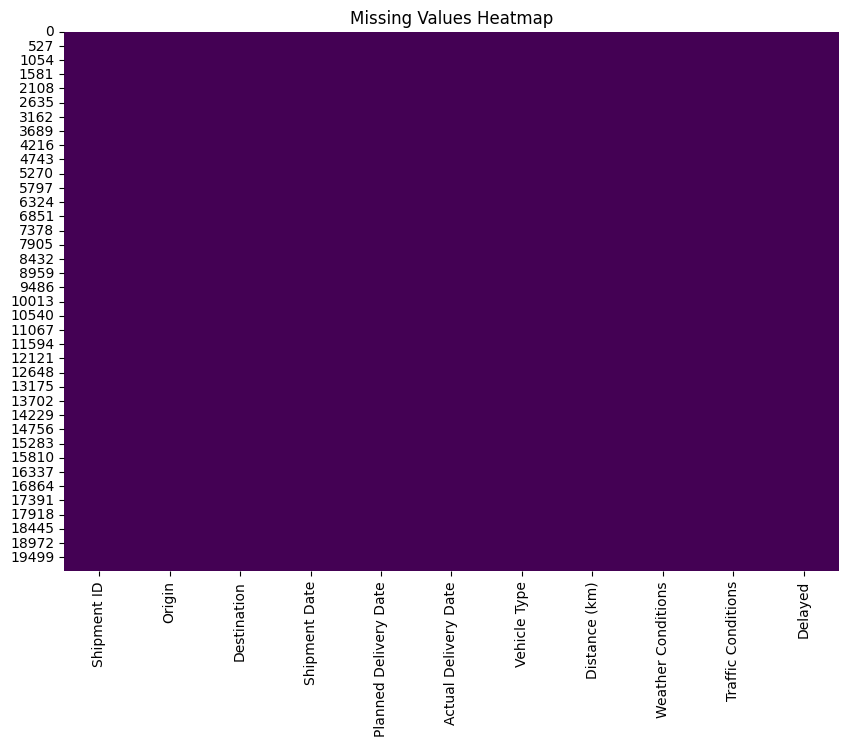

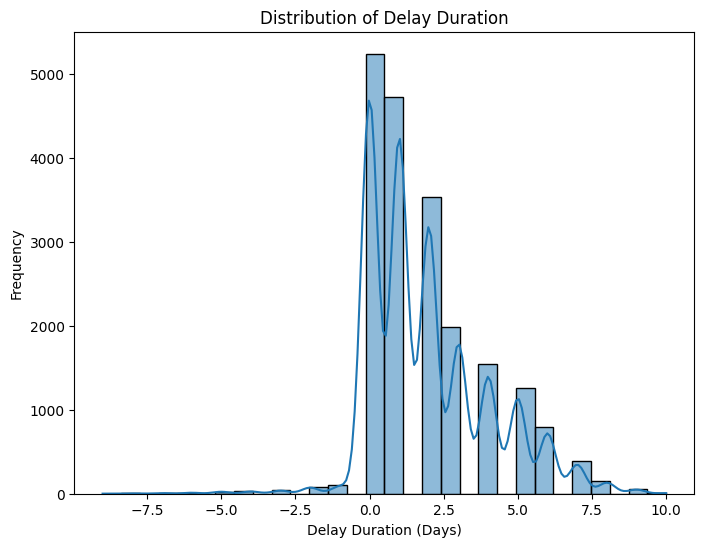

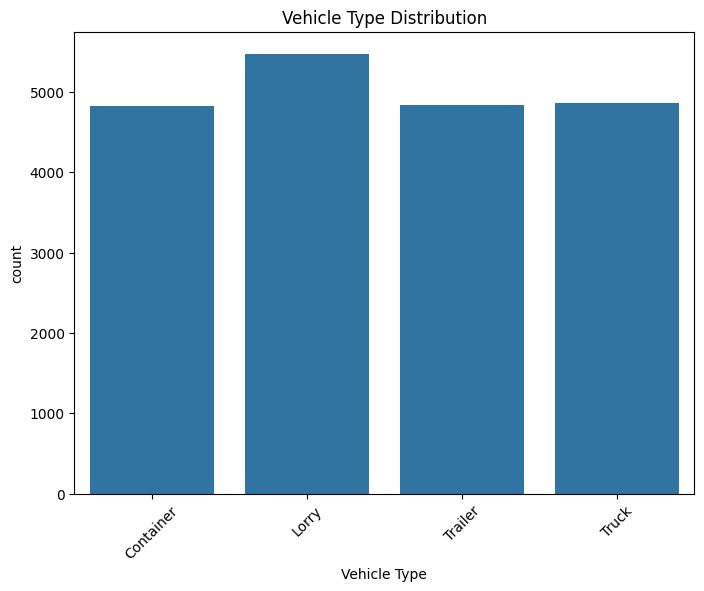

/var/folders/8s/4nvjlx950cz2qm88fh0sh3bw0000gn/T/ipykernel_39881/4179910257.py:61: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, vmin=-1, vmax=1)


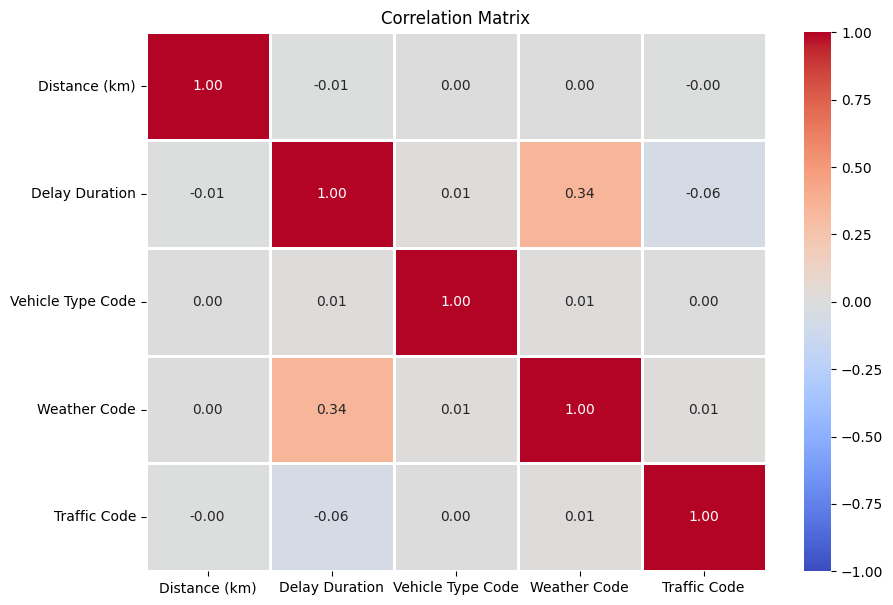

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,Delay Duration,Vehicle Type Code,Weather Code,Traffic Code
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes,1,2,2,1
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes,4,2,3,2
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No,0,3,0,1
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No,0,0,0,1
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes,2,0,0,0


In [2]:
# notebooks/02_feature_engineering.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('../data/processed/shipment_data_cleaned.csv')

# Display basic info about the dataset
print("Dataset Info:")
df.info()

# Display first few rows
df.head()

# EDA: Plotting missing values heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Feature Engineering:
# Create a new feature: Shipment Delay Time (difference between Actual and Planned Delivery Date)
df['Shipment Date'] = pd.to_datetime(df['Shipment Date'])
df['Planned Delivery Date'] = pd.to_datetime(df['Planned Delivery Date'])
df['Actual Delivery Date'] = pd.to_datetime(df['Actual Delivery Date'])

df['Delay Duration'] = (df['Actual Delivery Date'] - df['Planned Delivery Date']).dt.days

# Visualizing the delay duration
plt.figure(figsize=(8, 6))
sns.histplot(df['Delay Duration'], bins=30, kde=True)
plt.title('Distribution of Delay Duration')
plt.xlabel('Delay Duration (Days)')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering: Vehicle Type encoding
# Encoding vehicle types into categorical codes
df['Vehicle Type'] = df['Vehicle Type'].astype('category')
df['Vehicle Type Code'] = df['Vehicle Type'].cat.codes

# Plotting the distribution of Vehicle Types
plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle Type', data=df)
plt.title('Vehicle Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Weather and Traffic conditions encoding
df['Weather Conditions'] = df['Weather Conditions'].astype('category')
df['Weather Code'] = df['Weather Conditions'].cat.codes

df['Traffic Conditions'] = df['Traffic Conditions'].astype('category')
df['Traffic Code'] = df['Traffic Conditions'].cat.codes

# Exploring correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Additional feature engineering can be done here
# For example, you could create features like the day of the week, month, or holiday flags for 'Shipment Date'

# Saving the feature-engineered dataset
df.to_csv('../data/interim/feature_engineered_data.csv', index=False)

# Display the modified dataset
df.head()


In [3]:
unique_values = df['Weather Conditions'].nunique()
unique_values

4

In [4]:
# notebooks/02_feature_engineering.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('../data/processed/shipment_data_cleaned.csv')

# Derived Features:
# Delivery Delay (Days) = Actual Delivery Date - Planned Delivery Date
df['Shipment Date'] = pd.to_datetime(df['Shipment Date'])
df['Planned Delivery Date'] = pd.to_datetime(df['Planned Delivery Date'])
df['Actual Delivery Date'] = pd.to_datetime(df['Actual Delivery Date'])

df['Delay Duration'] = (df['Actual Delivery Date'] - df['Planned Delivery Date']).dt.days
df['Shipment Duration'] = (df['Planned Delivery Date'] - df['Shipment Date']).dt.days

# Is Weekend: Check if Shipment Date falls on a weekend
df['Is Weekend'] = df['Shipment Date'].dt.dayofweek >= 5  # 5 = Saturday, 6 = Sunday
df['Is Weekend'] = df['Is Weekend'].astype(int)

# Simplify Categorical Variables:
# Group similar weather conditions (e.g., "Storm" → "Rain")
df['Weather Conditions'] = df['Weather Conditions'].replace({'Storm': 'Rain'})

# Encode Weather Conditions as numeric (Clear: 0, Rain: 1, Fog: 2)
weather_mapping = {'Clear': 0, 'Rain': 1, 'Fog': 2}
df['Weather Code'] = df['Weather Conditions'].map(weather_mapping)

# Encode Traffic Conditions as ordinal (Light: 1, Moderate: 2, Heavy: 3)
traffic_mapping = {'Light': 1, 'Moderate': 2, 'Heavy': 3}
df['Traffic Code'] = df['Traffic Conditions'].map(traffic_mapping)

# Feature Interactions:
# Create interaction features: Distance * Traffic, Traffic * Weather
df['Distance_Traffic'] = df['Distance (km)'] * df['Traffic Code']
df['Traffic_Weather'] = df['Traffic Code'] * df['Weather Code']

# Date-Time Features: Extract additional features from Shipment Date
df['Day of Week'] = df['Shipment Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['Month'] = df['Shipment Date'].dt.month  # 1 = January, 12 = December
df['Quarter'] = df['Shipment Date'].dt.quarter  # 1 = Q1, 4 = Q4

# Saving the feature-engineered dataset
df.to_csv('../data/interim/feature_engineered_data.csv', index=False)

# Display the modified dataset
df.head()


,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,...,Delay Duration,Shipment Duration,Is Weekend,Weather Code,Traffic Code,Distance_Traffic,Traffic_Weather,Day of Week,Month,Quarter
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,...,1,5,0,1,1,1603,1,2,4,2
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Rain,Moderate,...,4,4,0,1,2,2474,2,3,2,1
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,...,0,6,0,0,1,1863,0,1,9,3
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,...,0,4,1,0,1,1374,0,5,4,2
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,...,2,2,0,0,3,2028,0,4,11,4


In [5]:
df.columns

Index(['Shipment ID', 'Origin', 'Destination', 'Shipment Date',
       'Planned Delivery Date', 'Actual Delivery Date', 'Vehicle Type',
       'Distance (km)', 'Weather Conditions', 'Traffic Conditions', 'Delayed',
       'Delay Duration', 'Shipment Duration', 'Is Weekend', 'Weather Code',
       'Traffic Code', 'Distance_Traffic', 'Traffic_Weather', 'Day of Week',
       'Month', 'Quarter'],
      dtype='object')

In [6]:
# 1. Import Necessary Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 2. Load Data
file_path = '../data/processed/feature_engineered_data.csv'
df = pd.read_csv(file_path)

# 3. Encode Categorical Variables

# Function to encode categorical variables
def encode_categorical(df):
    # One-Hot Encoding for categorical features like Origin and Destination
    df = pd.get_dummies(df, columns=['Origin', 'Destination'], drop_first=True)
    
    # Label Encoding for Vehicle Type
    label_encoder = LabelEncoder()
    df['Vehicle Type'] = label_encoder.fit_transform(df['Vehicle Type'])
    
    return df

df = encode_categorical(df)

# 4. Check Multicollinearity

# Function to check multicollinearity using VIF and correlation matrix
def check_multicollinearity(df):
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    X = df[numerical_cols]
    
    # Calculate the correlation matrix
    corr_matrix = X.corr()
    print("Correlation Matrix:")
    print(corr_matrix)
    
    # Compute VIF (Variance Inflation Factor)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    print("\nVariance Inflation Factor (VIF):")
    print(vif_data)

check_multicollinearity(df)

# 5. Feature Scaling

# Function to scale numerical features
def scale_features(df):
    # Features to scale
    numerical_cols = ['Distance (km)', 'Delay Duration', 'Shipment Duration', 'Distance_Traffic', 'Traffic_Weather']
    
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    return df

df = scale_features(df)

# 6. Save the Final Data
df.to_csv('../data/processed/feature_engineered_data_cleaned.csv', index=False)

print("Feature Engineering and Preprocessing Complete.")


Correlation Matrix:
                       Vehicle Type  Distance (km)  Delay Duration  \
Vehicle Type               1.000000       0.001913        0.010529   
Distance (km)              0.001913       1.000000       -0.006224   
Delay Duration             0.010529      -0.006224        1.000000   
Shipment Duration          0.003537       0.958067       -0.072075   
Is Weekend                 0.010661       0.011036       -0.004330   
Weather Code               0.019310       0.002432        0.358357   
Traffic Code              -0.006485       0.007736        0.345343   
Distance_Traffic          -0.004002       0.696887        0.219666   
Traffic_Weather            0.016757       0.002787        0.401625   
Day of Week                0.005251       0.006554       -0.005663   
Month                      0.007400       0.006829        0.001315   
Quarter                    0.009282       0.007010        0.003763   
Origin_Bangalore           0.001095       0.007150        0.007583   


In [7]:
# Drop features with extreme VIFs
features_to_drop = ['Quarter', 'Distance_Traffic', 'Shipment Duration']
df_reduced = df.drop(columns=features_to_drop)

# Recalculate VIF for reduced features
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_reduced = df_reduced.select_dtypes(include=['float64', 'int64'])  # Numerical features only
vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]

print(vif_data_reduced)


           feature       VIF
0     Vehicle Type  2.587784
1    Distance (km)  1.000254
2   Delay Duration  1.254891
3       Is Weekend  3.531863
4     Weather Code  5.488741
5     Traffic Code  4.154459
6  Traffic_Weather  4.386748
7      Day of Week  7.599872
8            Month  3.209391


In [17]:
X_reduced

,Vehicle Type,Distance (km),Delay Duration,Is Weekend,Weather Code,Traffic Code,Traffic_Weather,Day of Week,Month
0,2,0.962803,-0.457701,0,1,1,0.274757,2,4
1,2,0.259910,1.009838,0,1,2,1.089937,3,2
2,3,1.462126,-0.946881,0,0,1,-0.540424,1,9
3,0,0.523015,-0.946881,1,0,1,-0.540424,5,4
4,0,-0.817476,0.031479,0,0,3,-0.540424,4,11
...,...,...,...,...,...,...,...,...,...
19995,3,-1.032569,0.520659,0,2,2,2.720298,3,6
19996,3,-1.529972,1.009838,0,1,2,1.089937,3,3
19997,2,-0.141469,1.988198,0,1,2,1.089937,2,5
19998,1,-0.377688,0.520659,0,2,2,2.720298,1,5


In [8]:
import pandas as pd

# Define the file path for saving
scaled_reduced_file_path = "../data/interim/scaled_reduced_data.csv"

# Save X_reduced to interim
X_reduced.to_csv(scaled_reduced_file_path, index=False)

print("X_reduced has been saved as 'scaled_reduced_data.csv' in the interim folder.")


X_reduced has been saved as 'scaled_reduced_data.csv' in the interim folder.


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# List of categorical columns
categorical_columns = ['Origin', 'Destination']

# Apply OneHotEncoder to the dataframe
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], 
    remainder='passthrough'  # Leave the numerical columns as they are
)

# Use the original dataframe (not X_reduced) for encoding
df_encoded = encoder.fit_transform(df)  # df contains all the original columns

# Convert the result back into a DataFrame
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(df_encoded, columns=encoded_columns)

# Merge the target variable 'Delayed' from the original dataframe (df)
df_final = pd.concat([encoded_df, df[['Delayed']]], axis=1)

print(df_final.head())


ValueError: A given column is not a column of the dataframe

In [10]:
df.columns

Index(['Shipment ID', 'Shipment Date', 'Planned Delivery Date',
       'Actual Delivery Date', 'Vehicle Type', 'Distance (km)',
       'Weather Conditions', 'Traffic Conditions', 'Delayed', 'Delay Duration',
       'Shipment Duration', 'Is Weekend', 'Weather Code', 'Traffic Code',
       'Distance_Traffic', 'Traffic_Weather', 'Day of Week', 'Month',
       'Quarter', 'Origin_Bangalore', 'Origin_Chennai', 'Origin_Delhi',
       'Origin_Hyderabad', 'Origin_Jaipur', 'Origin_Kolkata', 'Origin_Lucknow',
       'Origin_Mumbai', 'Origin_Pune', 'Destination_Bangalore',
       'Destination_Chennai', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Jaipur', 'Destination_Kolkata', 'Destination_Lucknow',
       'Destination_Mumbai', 'Destination_Pune'],
      dtype='object')

In [11]:
df_cleaned=df
df_cleaned

,Shipment ID,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,Delay Duration,...,Origin_Pune,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Jaipur,Destination_Kolkata,Destination_Lucknow,Destination_Mumbai,Destination_Pune
0,SHIP000000,2023-04-26,2023-05-01,2023-05-02,2,0.962803,Rain,Light,Yes,-0.457701,...,0,0,0,0,0,0,0,0,1,0
1,SHIP000001,2023-02-09,2023-02-13,2023-02-17,2,0.259910,Rain,Moderate,Yes,1.009838,...,0,0,0,1,0,0,0,0,0,0
2,SHIP000002,2023-09-19,2023-09-25,2023-09-25,3,1.462126,Clear,Light,No,-0.946881,...,0,0,1,0,0,0,0,0,0,0
3,SHIP000003,2023-04-01,2023-04-05,2023-04-05,0,0.523015,Clear,Light,No,-0.946881,...,0,0,0,0,0,0,0,0,0,0
4,SHIP000004,2023-11-24,2023-11-26,2023-11-28,0,-0.817476,Clear,Heavy,Yes,0.031479,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019995,2023-06-22,2023-06-23,2023-06-26,3,-1.032569,Fog,Moderate,Yes,0.520659,...,0,1,0,0,0,0,0,0,0,0
19996,SHIP019996,2023-03-02,2023-03-03,2023-03-07,3,-1.529972,Rain,Moderate,Yes,1.009838,...,0,0,0,0,0,1,0,0,0,0
19997,SHIP019997,2023-05-24,2023-05-27,2023-06-02,2,-0.141469,Rain,Moderate,Yes,1.988198,...,0,0,0,0,0,0,0,0,1,0
19998,SHIP019998,2023-05-02,2023-05-05,2023-05-08,1,-0.377688,Fog,Moderate,Yes,0.520659,...,0,0,1,0,0,0,0,0,0,0


In [12]:
df_cleaned = df.drop(columns=['Shipment ID', 'Shipment Date', 'Planned Delivery Date', 'Actual Delivery Date', 'Weather Conditions', 'Traffic Conditions'])


In [13]:
df_cleaned

,Vehicle Type,Distance (km),Delayed,Delay Duration,Shipment Duration,Is Weekend,Weather Code,Traffic Code,Distance_Traffic,Traffic_Weather,...,Origin_Pune,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Jaipur,Destination_Kolkata,Destination_Lucknow,Destination_Mumbai,Destination_Pune
0,2,0.962803,Yes,-0.457701,0.997530,0,1,1,-0.180589,0.274757,...,0,0,0,0,0,0,0,0,1,0
1,2,0.259910,Yes,1.009838,0.421123,0,1,2,0.520343,1.089937,...,0,0,0,1,0,0,0,0,0,0
2,3,1.462126,No,-0.946881,1.573938,0,0,1,0.028644,-0.540424,...,0,0,1,0,0,0,0,0,0,0
3,0,0.523015,No,-0.946881,0.421123,1,0,1,-0.364876,-0.540424,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.817476,Yes,0.031479,-0.731691,0,0,3,0.161427,-0.540424,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,-1.032569,Yes,0.520659,-1.308099,0,2,2,-0.562843,2.720298,...,0,1,0,0,0,0,0,0,0,0
19996,3,-1.529972,Yes,1.009838,-1.308099,0,1,2,-0.979700,1.089937,...,0,0,0,0,0,1,0,0,0,0
19997,2,-0.141469,Yes,1.988198,-0.155284,0,1,2,0.183960,1.089937,...,0,0,0,0,0,0,0,0,1,0
19998,1,-0.377688,Yes,0.520659,-0.155284,0,2,2,-0.014007,2.720298,...,0,0,1,0,0,0,0,0,0,0


In [14]:
df_cleaned.columns

Index(['Vehicle Type', 'Distance (km)', 'Delayed', 'Delay Duration',
       'Shipment Duration', 'Is Weekend', 'Weather Code', 'Traffic Code',
       'Distance_Traffic', 'Traffic_Weather', 'Day of Week', 'Month',
       'Quarter', 'Origin_Bangalore', 'Origin_Chennai', 'Origin_Delhi',
       'Origin_Hyderabad', 'Origin_Jaipur', 'Origin_Kolkata', 'Origin_Lucknow',
       'Origin_Mumbai', 'Origin_Pune', 'Destination_Bangalore',
       'Destination_Chennai', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Jaipur', 'Destination_Kolkata', 'Destination_Lucknow',
       'Destination_Mumbai', 'Destination_Pune'],
      dtype='object')

In [15]:
X_reduced.columns

Index(['Vehicle Type', 'Distance (km)', 'Delay Duration', 'Is Weekend',
       'Weather Code', 'Traffic Code', 'Traffic_Weather', 'Day of Week',
       'Month'],
      dtype='object')

In [16]:
df_cleaned = df_cleaned.drop(columns=['Shipment Duration','Distance_Traffic','Quarter'])
df_cleaned

,Vehicle Type,Distance (km),Delayed,Delay Duration,Is Weekend,Weather Code,Traffic Code,Traffic_Weather,Day of Week,Month,...,Origin_Pune,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Jaipur,Destination_Kolkata,Destination_Lucknow,Destination_Mumbai,Destination_Pune
0,2,0.962803,Yes,-0.457701,0,1,1,0.274757,2,4,...,0,0,0,0,0,0,0,0,1,0
1,2,0.259910,Yes,1.009838,0,1,2,1.089937,3,2,...,0,0,0,1,0,0,0,0,0,0
2,3,1.462126,No,-0.946881,0,0,1,-0.540424,1,9,...,0,0,1,0,0,0,0,0,0,0
3,0,0.523015,No,-0.946881,1,0,1,-0.540424,5,4,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.817476,Yes,0.031479,0,0,3,-0.540424,4,11,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,-1.032569,Yes,0.520659,0,2,2,2.720298,3,6,...,0,1,0,0,0,0,0,0,0,0
19996,3,-1.529972,Yes,1.009838,0,1,2,1.089937,3,3,...,0,0,0,0,0,1,0,0,0,0
19997,2,-0.141469,Yes,1.988198,0,1,2,1.089937,2,5,...,0,0,0,0,0,0,0,0,1,0
19998,1,-0.377688,Yes,0.520659,0,2,2,2.720298,1,5,...,0,0,1,0,0,0,0,0,0,0


In [17]:
df_cleaned

,Vehicle Type,Distance (km),Delayed,Delay Duration,Is Weekend,Weather Code,Traffic Code,Traffic_Weather,Day of Week,Month,...,Origin_Pune,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Jaipur,Destination_Kolkata,Destination_Lucknow,Destination_Mumbai,Destination_Pune
0,2,0.962803,Yes,-0.457701,0,1,1,0.274757,2,4,...,0,0,0,0,0,0,0,0,1,0
1,2,0.259910,Yes,1.009838,0,1,2,1.089937,3,2,...,0,0,0,1,0,0,0,0,0,0
2,3,1.462126,No,-0.946881,0,0,1,-0.540424,1,9,...,0,0,1,0,0,0,0,0,0,0
3,0,0.523015,No,-0.946881,1,0,1,-0.540424,5,4,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.817476,Yes,0.031479,0,0,3,-0.540424,4,11,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,-1.032569,Yes,0.520659,0,2,2,2.720298,3,6,...,0,1,0,0,0,0,0,0,0,0
19996,3,-1.529972,Yes,1.009838,0,1,2,1.089937,3,3,...,0,0,0,0,0,1,0,0,0,0
19997,2,-0.141469,Yes,1.988198,0,1,2,1.089937,2,5,...,0,0,0,0,0,0,0,0,1,0
19998,1,-0.377688,Yes,0.520659,0,2,2,2.720298,1,5,...,0,0,1,0,0,0,0,0,0,0


In [18]:
df_cleaned['Delayed'] = df_cleaned['Delayed'].map({'Yes': 1, 'No': 0})

In [19]:
df_cleaned

,Vehicle Type,Distance (km),Delayed,Delay Duration,Is Weekend,Weather Code,Traffic Code,Traffic_Weather,Day of Week,Month,...,Origin_Pune,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Jaipur,Destination_Kolkata,Destination_Lucknow,Destination_Mumbai,Destination_Pune
0,2,0.962803,1,-0.457701,0,1,1,0.274757,2,4,...,0,0,0,0,0,0,0,0,1,0
1,2,0.259910,1,1.009838,0,1,2,1.089937,3,2,...,0,0,0,1,0,0,0,0,0,0
2,3,1.462126,0,-0.946881,0,0,1,-0.540424,1,9,...,0,0,1,0,0,0,0,0,0,0
3,0,0.523015,0,-0.946881,1,0,1,-0.540424,5,4,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.817476,1,0.031479,0,0,3,-0.540424,4,11,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,-1.032569,1,0.520659,0,2,2,2.720298,3,6,...,0,1,0,0,0,0,0,0,0,0
19996,3,-1.529972,1,1.009838,0,1,2,1.089937,3,3,...,0,0,0,0,0,1,0,0,0,0
19997,2,-0.141469,1,1.988198,0,1,2,1.089937,2,5,...,0,0,0,0,0,0,0,0,1,0
19998,1,-0.377688,1,0.520659,0,2,2,2.720298,1,5,...,0,0,1,0,0,0,0,0,0,0


In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_cleaned.drop(columns=['Delayed'])  # Features (all except the target)
y = df_cleaned['Delayed']  # Target variable (Delayed)

# Split the data into training and test sets (optional, but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' means balancing the minority class to the majority class
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_balanced.value_counts())

# Optionally, save the balanced data
df_balanced = X_train_balanced.copy()
df_balanced['Delayed'] = y_train_balanced


Before SMOTE: 1    11806
0     4194
Name: Delayed, dtype: int64
After SMOTE: 0    11806
1    11806
Name: Delayed, dtype: int64


In [25]:
df_balanced.drop(['Delay Duration'], axis=1, inplace=True)


In [27]:
df_balanced.drop(['Traffic_Weather'], axis=1, inplace=True)

In [26]:
df_balanced.columns


Index(['Vehicle Type', 'Distance (km)', 'Is Weekend', 'Weather Code',
       'Traffic Code', 'Traffic_Weather', 'Day of Week', 'Month',
       'Origin_Bangalore', 'Origin_Chennai', 'Origin_Delhi',
       'Origin_Hyderabad', 'Origin_Jaipur', 'Origin_Kolkata', 'Origin_Lucknow',
       'Origin_Mumbai', 'Origin_Pune', 'Destination_Bangalore',
       'Destination_Chennai', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Jaipur', 'Destination_Kolkata', 'Destination_Lucknow',
       'Destination_Mumbai', 'Destination_Pune', 'Delayed'],
      dtype='object')

In [28]:
df_balanced.to_csv('../data/processed/df_balanced.csv', index=False)
